In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from matplotlib import rcParams

# EDA

Read the data 

In [14]:
df = pd.read_csv('train.csv')

Quick look at the data 

In [15]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


Get information about the columns, we can see that there are a lot of columns that are numbers but they are are classified as an object and also have no nans

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

We will check if really are no nans and we can see that are some nans in the dataset.

In [17]:
df = df.applymap(lambda x: np.nan if isinstance(x, str) and 'nan' in x.lower() else x)

df.isna().sum()


ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

The target column has '(min)' when we need only the number

In [18]:
df = df.rename(columns={'Time_taken(min)': 'target'})

df['target'] = df['target'].str.extract('(\d+)').astype(float)
df['target']

0        24.0
1        33.0
2        26.0
3        21.0
4        30.0
         ... 
45588    32.0
45589    36.0
45590    16.0
45591    26.0
45592    36.0
Name: target, Length: 45593, dtype: float64

Here we convert the numeric columns labeled as object as numeric, then the columns that are dates or hours we convert it into something more useful

In [19]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

def calculate_time(data):
    data['Time_Orderd'] = pd.to_timedelta(data['Time_Orderd'])
    data['Time_Order_picked'] = pd.to_timedelta(data['Time_Order_picked'])
    
    data['Time_Order_picked'] = np.where(
        data['Time_Order_picked'] < data['Time_Orderd'],
        data['Order_Date'] + pd.DateOffset(1) + data['Time_Order_picked'],
        data['Order_Date'] + data['Time_Order_picked']
    )
    
    data['Time_Orderd'] = data['Order_Date'] + data['Time_Orderd']
    
    data['Time_Order_picked'] = (data['Time_Order_picked'] - pd.Timestamp('2022-01-01')) // pd.Timedelta('1min')
    data['Time_Orderd'] = (data['Time_Orderd'] - pd.Timestamp('2022-01-01')) // pd.Timedelta('1min')

    return data[['Time_Order_picked', 'Time_Orderd']]

calculate_time(df)



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43739 non-null  float64       
 3   Delivery_person_Ratings      43685 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  float64       
 10  Time_Order_picked            45593 non-null  int64         
 11  Weatherconditions            44977 non-nu

Some columns like latitude will not be important to the models because they have no relevant information by themselves but if we get the distance between the restaurant and the delivery location the algorithm can consider it important, the same with time.

In [20]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,target
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,111570.0,111585,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,120705.0,120710,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,111390.0,111405,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,136440.0,136450,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,121770.0,121785,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,118775.0,118785,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32.0
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,67435.0,67450,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36.0
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,100790.0,100805,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16.0
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,94415.0,94420,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26.0


In [21]:
def convert_columns(df):
    df['latitude_distance'] = 100 * np.abs(df['Restaurant_latitude'] - df['Delivery_location_latitude'])
    df['latitude_distance'] = np.where(df['latitude_distance'] > 500, np.nan, df['latitude_distance'])

    df['longitude_distance'] = 100 * np.abs(df['Restaurant_longitude'] - df['Delivery_location_longitude'])
    df['longitude_distance'] = np.where(df['longitude_distance'] > 500, np.nan, df['longitude_distance'])
    
    df['distance'] = np.sqrt((df['latitude_distance'])**2 + (df['longitude_distance']))
    

    df['time_diff'] = df['Time_Order_picked'] - df['Time_Orderd']
    
    # df["day"] = df.Order_Date.dt.day
    # df["week"] = df.Order_Date.dt.isocalendar().week
    # df["month"] = df.Order_Date.dt.month
    # df["quarter"] = df.Order_Date.dt.quarter
    #df['day_of_week'] = df.Order_Date.dt.day_of_week.astype(int)
    # df["is_month_start"] = df.Order_Date.dt.is_month_start.astype(int)
    # df["is_month_end"] = df.Order_Date.dt.is_month_end.astype(int)
    # df["is_quarter_start"] = df.Order_Date.dt.is_quarter_start.astype(int)
    # df["is_quarter_end"] = df.Order_Date.dt.is_quarter_end.astype(int)
    df['is_weekend'] = np.where((df.Order_Date.dt.day_of_week.astype(int)).isin([5,6]),1,0)

    df = df.drop(columns='ID', axis=1)

    df = df.drop(columns = 'Order_Date', axis =1 )    
    
    cols = [col for col in df.columns if col != 'target'] + ['target']
    df = df[cols]
    return df

df = convert_columns(df)


In [ ]:
# sns.set(font_scale = 3)
# rcParams['figure.figsize'] = 40,60
# plt.subplots_adjust(hspace=0.5)
# palette = sns.color_palette("viridis", as_cmap=True)

# i = 1

# for name in df.columns:
#     plt.subplot(12,2,i)
#     sns.histplot(data=df, x=name, color=palette(i/len(df.columns)))
#     i = i + 1

Error in callback <function _draw_all_if_interactive at 0x000001B778DC34C0> (for post_execute):


KeyboardInterrupt: 

In [22]:
df['distance']

0         2.449490
1        13.490738
2         1.414214
3         5.477226
4         4.472136
           ...    
45588     1.414214
45589     7.483315
45590     3.464102
45591     4.472136
45592     8.485281
Name: distance, Length: 45593, dtype: float64

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
columns_to_encode = ['Delivery_person_ID','Road_traffic_density', 'Weatherconditions', 
                     'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])



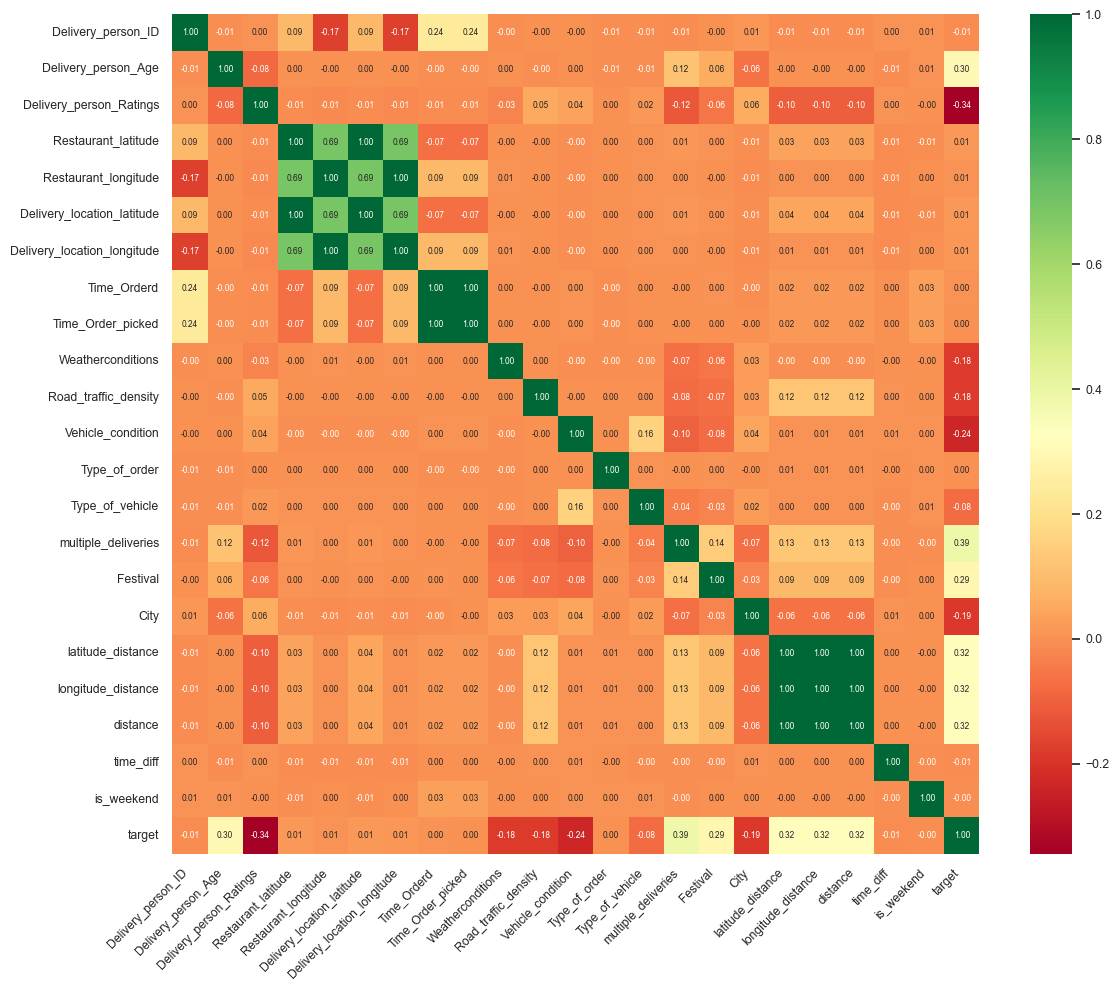

In [319]:
import seaborn as sns

def matrix_corr(data):
    correlation = data.corr()
    plt.figure(figsize=(12, 10))
    sns.set(font_scale=0.8)
    sns.heatmap(correlation, annot=True, fmt=".2f", cbar=True, cmap="RdYlGn", annot_kws={"size": 6})
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()

matrix_corr(df)

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 10)
df_imp = imputer.fit_transform(df)
df_imp = pd.DataFrame(df_imp, columns=df.columns)
df_imp[columns_to_encode] = df_imp[columns_to_encode].round(0)

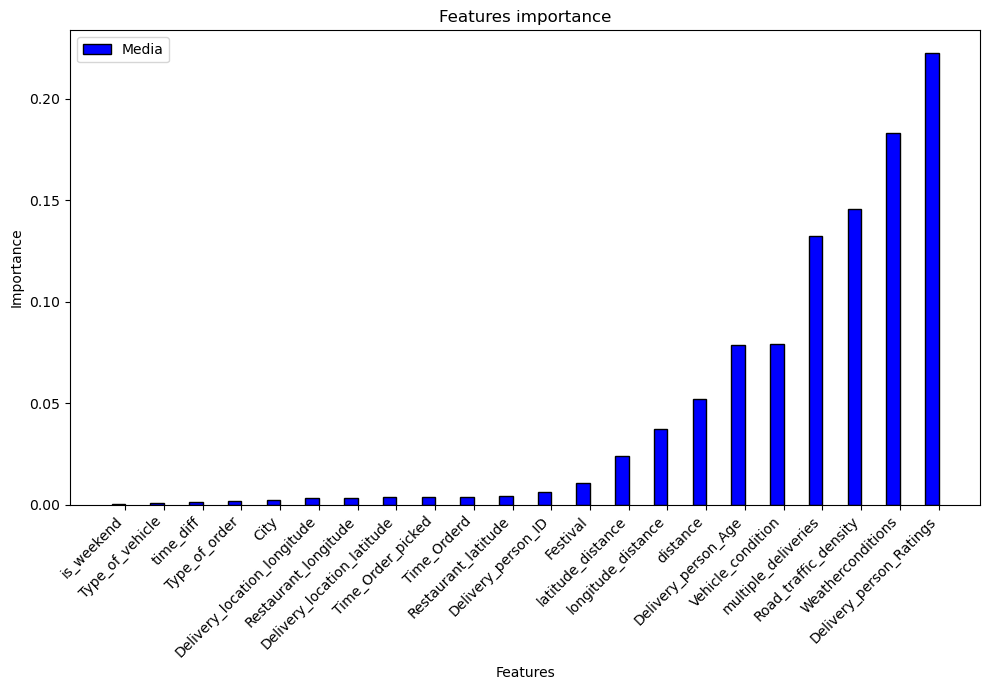

In [25]:
from sklearn.ensemble import RandomForestRegressor
X_imp = df_imp.drop(columns='target', axis = 1)
y_imp = df_imp['target']

model = RandomForestRegressor(max_depth= 12, n_jobs = -1 )
model.fit(X_imp, y_imp)

importances = model.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(10, 7))

bar_width = 0.35
r1 = np.arange(X_imp.shape[1])

plt.bar(r1, importances[indices], color='blue', width=bar_width, edgecolor='black', label='Media')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Features importance')
plt.xticks(r1 + bar_width / 2, X_imp.columns[indices], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
columns_to_drop = ['time_diff', 'Type_of_order', 
                   'Delivery_location_latitude', 'Delivery_location_longitude',
                   'Time_Orderd', 'Time_Order_picked', 
                   'Restaurant_latitude', 'Restaurant_longitude',
                   'City', 'Delivery_person_ID', 'latitude_distance',
                   ]

df = df.drop(columns = columns_to_drop, axis = 1)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
def param_heat(results, param_grid, param_x, param_y):

    sns.set(font_scale=1.5)

    param_x_r = param_grid[param_x]
    param_y_r = param_grid[param_y]
    test_scores = results['mean_test_score'].values.reshape(len(param_y_r), len(param_x_r))
    train_scores = results['mean_train_score'].values.reshape(len(param_y_r), len(param_x_r))

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.heatmap(train_scores, annot=True, xticklabels=param_x_r, yticklabels=param_y_r, cmap='coolwarm', ax=axes[0])
    axes[0].set_title('Train Score')
    axes[0].set_xlabel(param_x)
    axes[0].set_ylabel(param_y)

    sns.heatmap(test_scores, annot=True, xticklabels=param_x_r, yticklabels=param_y_r, cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Test Score')
    axes[1].set_xlabel(param_x)
    axes[1].set_ylabel(param_y)

    plt.tight_layout()
    plt.show()


In [29]:
def training(model, X_train, y_train, param_grid):

    cv = 4

    grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1,
                                return_train_score=True, verbose = 1)
    
    grid_search.fit(X_train, y_train)

    cv_results = pd.DataFrame(grid_search.cv_results_)
    
    print('Los mejores parámetros son:', grid_search.best_params_)
    print('El score de entrenamiento es:', cv_results['mean_train_score'].iloc[grid_search.best_index_])
    print('El mejor score es:', grid_search.best_score_)
    

    return cv_results, grid_search


In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42 )

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

integer_columns = ['Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle', 'multiple_deliveries', 'Festival']

X_train_df[integer_columns] = X_train_df[integer_columns].round(0)
X_test_df[integer_columns] = X_test_df[integer_columns].round(0)

X_train = X_train_df.values
X_test = X_test_df.values

In [31]:
rf_param = {
    'n_estimators': [150, 200, 250, 300],
    'max_depth': range(9,14)
}

rf_results, rf = training(RandomForestRegressor(max_features = 'sqrt', 
                                                min_samples_leaf= 10, n_jobs = -1), 
                                                X_train, y_train, rf_param)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Los mejores parámetros son: {'max_depth': 13, 'n_estimators': 200}
El score de entrenamiento es: 0.8231834357466092
El mejor score es: 0.7981798772964248


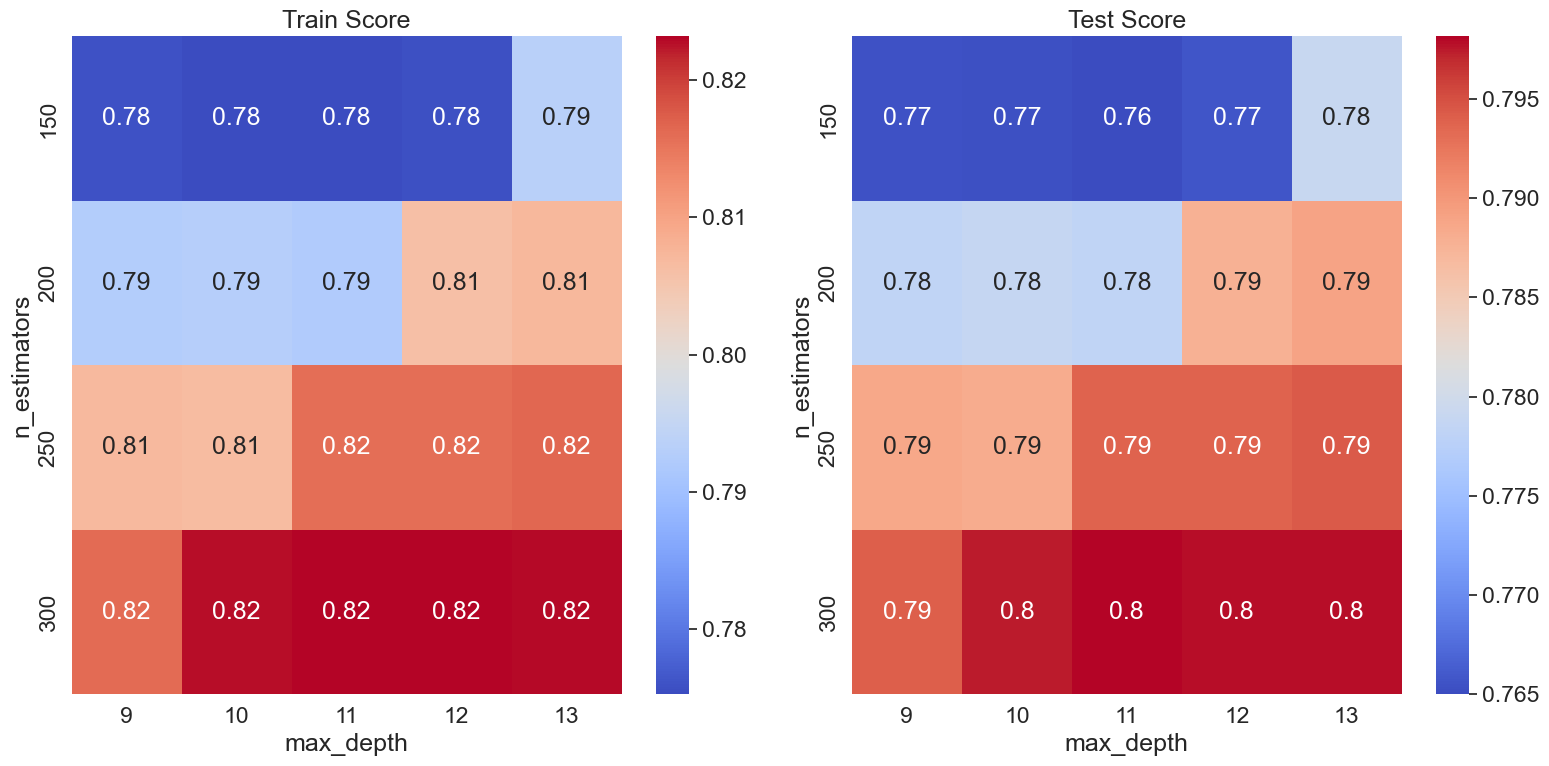

In [32]:
param_heat(rf_results, rf_param, 'max_depth', 'n_estimators')

In [33]:
from xgboost import XGBRegressor
xgb_params = {'max_depth' : range(8, 13), #6, 14
              'learning_rate' : [0.2, 0.05, 0.01, 0.1, 0.075] #0.001, 0.01, 0.1
    }

xgb_results, xgb = training(XGBRegressor(n_estimators = 200, min_child_weight = 20), X_train, y_train, xgb_params)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Los mejores parámetros son: {'learning_rate': 0.05, 'max_depth': 9}
El score de entrenamiento es: 0.8586850157776633
El mejor score es: 0.82197315496089


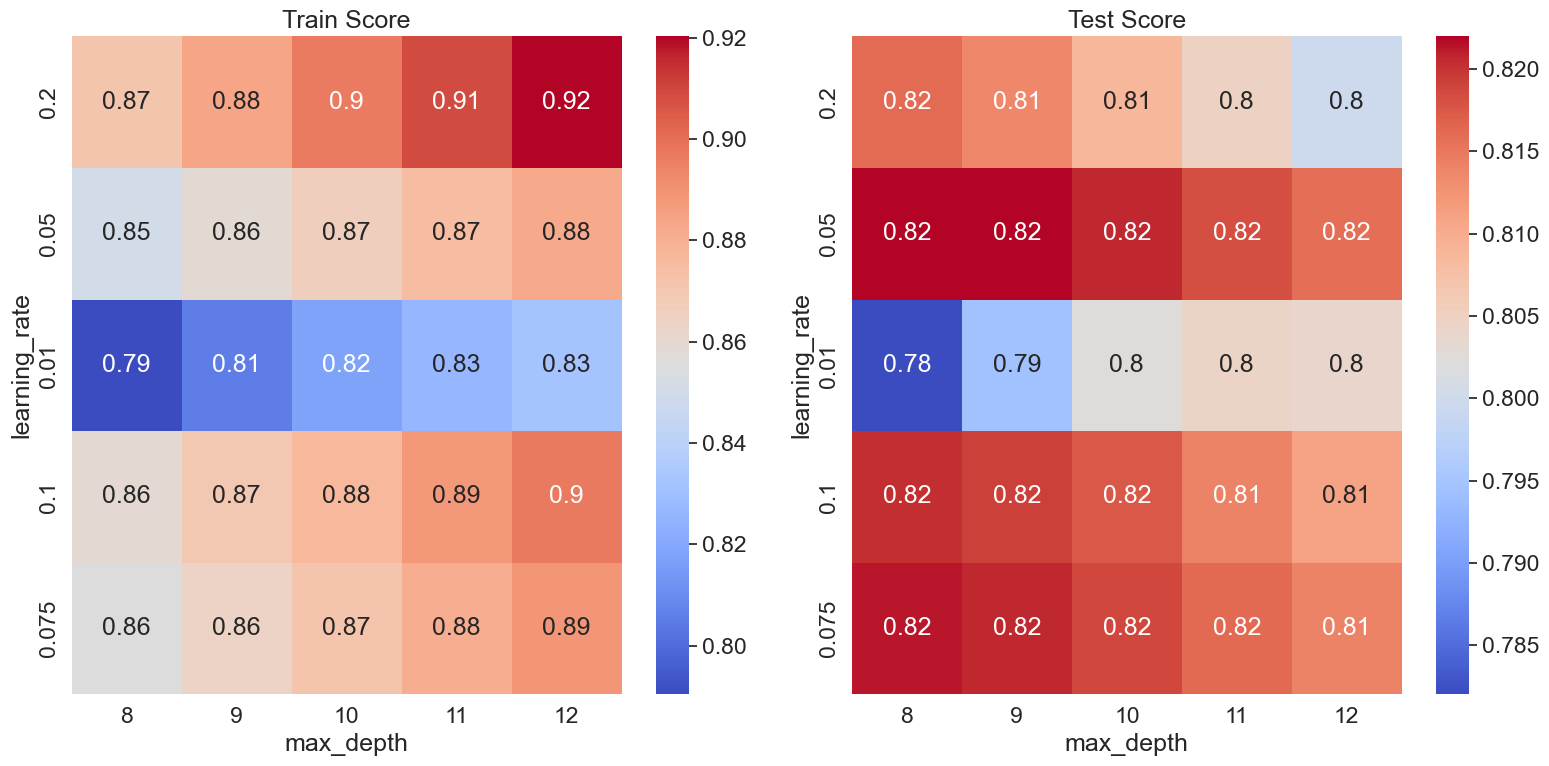

In [34]:
param_heat(xgb_results, xgb_params, 'max_depth', 'learning_rate')

In [35]:
xgb_params = {'max_depth' : range(8, 13), #6, 14
              'learning_rate' : [0.05, 0.1, 0.02, 0.04, 0.08, 0.06], #0.001, 0.01, 0.1
              'min_child_weight' : [5, 10],
              'reg_lambda' :[1, 10, 100]
              
    }

model_results, model = training(XGBRegressor(n_estimators = 200), X_train, y_train, xgb_params)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Los mejores parámetros son: {'learning_rate': 0.08, 'max_depth': 10, 'min_child_weight': 5, 'reg_lambda': 100}
El score de entrenamiento es: 0.8575355875239618
El mejor score es: 0.8240084294045441


In [51]:
import plotly.express as px

params_and_score = model_results[['param_max_depth', 'param_learning_rate', 'param_min_child_weight', 'param_reg_lambda', 'mean_test_score']]

params_and_score['param_max_depth'] = params_and_score['param_max_depth'].astype(int)
params_and_score['param_min_child_weight'] = params_and_score['param_min_child_weight'].astype(int)
params_and_score['param_reg_lambda'] = params_and_score['param_reg_lambda'].astype(float)
params_and_score['param_learning_rate'] = params_and_score['param_learning_rate'].astype(float)

fig = px.parallel_coordinates(params_and_score, 
                              dimensions=['param_max_depth', 'param_learning_rate', 'param_min_child_weight', 'param_reg_lambda', 'mean_test_score'],
                              color="mean_test_score", 
                              color_continuous_scale=px.colors.sequential.Viridis)

fig.show()


C:\Users\xavie\AppData\Local\Temp\ipykernel_7916\658195427.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\xavie\AppData\Local\Temp\ipykernel_7916\658195427.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\xavie\AppData\Local\Temp\ipykernel_7916\658195427.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [52]:
xgb_params = {'max_depth' : range(9, 14), #6, 14
              'learning_rate' : [0.05, 0.04, 0.08, 0.06, 0.07], #0.001, 0.01, 0.1
              'min_child_weight' : [3, 5],
              'reg_lambda' :[100, 1000]
              
    }

model_results, model = training(XGBRegressor(n_estimators = 200), X_train, y_train, xgb_params)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Los mejores parámetros son: {'learning_rate': 0.08, 'max_depth': 10, 'min_child_weight': 5, 'reg_lambda': 100}
El score de entrenamiento es: 0.8575355875239618
El mejor score es: 0.8240084294045441


In [53]:
model.score(X_test, y_test)

0.8239771619159348